In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# Contents

* [<font size=4>Getting Started</font>](#1)
    * [Importing the Libraries](#1.1)
    * [Importing and Inspecting the Data](#1.2)
   
   
* [<font size=4>Fitting the model</font>](#2)
    * [Setting up the input and the output variable](#2.1)
    * [Fitting the Model](#2.2)
    * [Evaluating the Model](#2.3)
    * [Playing with Max Depth](#2.4)
    * [Playing with diffrent Train-Test Split](#2.5)
    * [Regression Tree](#2.6)
    

# Getting Started <a id="1"></a>
Here we describe installing and importing the library, impoting the datset and some basic checks on the dataset

# Installing and importing library <a id="1.1"></a>

In [ ]:
! pip install pydotplus

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Importing and inspecting Dataset <a id="1.2"></a>

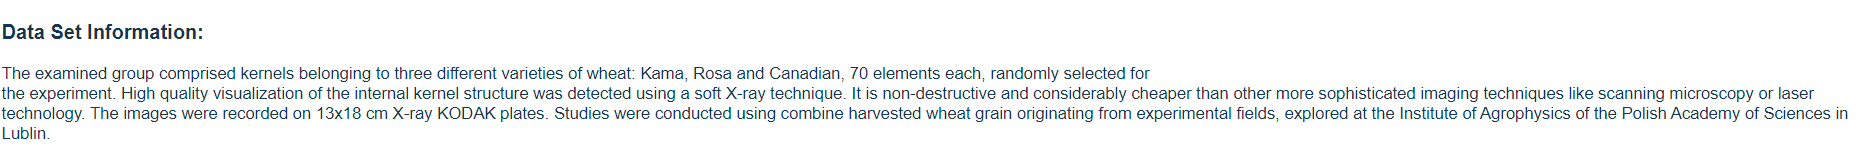

In [ ]:
df=pd.read_csv("/kaggle/input/uciseeds/seeds.csv")
print(df.shape)
print(df.describe())
df.head(2)

# Fitting the model <a id="2"></a>
In this section, we discuss about setting the input, output data, splitting into training and testing. Fitting the decision Tree, look at it's some of the parameter, visualize the tree.

# Setting up input output <a id="2.1"></a>

In [ ]:
X=df.iloc[:,0:7]
y=df.iloc[:,7]
feature_names=list(X.columns)
print(feature_names)

# Fitting the model <a id="2.2"></a>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test
clf = DecisionTreeClassifier()
#clf = DecisionTreeClassifier(min_samples_leaf = 20)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

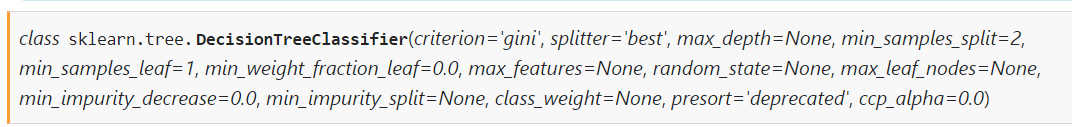

1. criterion{“gini”, “entropy”}
2. splitter{“best”, “random”}
3. max_depth int
4. min_samples_split int or float
5. min_samples_leaf int or float
5. max_leaf_nodes int

# Visuaizing the Tree  <a id="2.3"></a>

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names=['1','2','3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('seeds.png')
Image(graph.create_png())

# Evaluating the Model <a id="2.4"></a>

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
print('\nConfusion matrix')
print(confusion_matrix(y_test, y_pred))

#Classification Report
from sklearn.metrics import classification_report
print('\nClassification Report')
print(classification_report(y_test, y_pred))  

# Playing with max depth parameter<a id="2.5"></a>

In [ ]:
nc=np.arange(1,50,2)
acc=np.empty(25)
i=0
for k in np.nditer(nc):
    clf = DecisionTreeClassifier(max_depth = int(k))
    clf.fit(X_train, y_train)
    temp= clf.score(X_test, y_test)
    acc[i]=temp
    i = i + 1

In [ ]:
x=pd.Series(acc,index=nc)
x.plot()
# Add title and axis names
plt.title('Max Depth vs Accuracy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show() 

# Experimenting with test set accuracy with diffrent random sample

In [ ]:
nc=np.arange(1,1000,2)
acc=np.empty(500)
i=0
for k in np.nditer(nc):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=int(k))
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    temp= clf.score(X_test, y_test)
    acc[i]=temp
    i = i + 1

**Plotting accuracy of diffrent test set**

In [ ]:
x=pd.Series(acc,index=nc)
x.plot(kind='box')
# Add title and axis names
plt.title('Accuracy on diffrent test set')
plt.xlabel('Seed valus')
plt.ylabel('Accuracy')
plt.show() 

In [ ]:
# Reading the File
df=pd.read_csv("/kaggle/input/advtlr/Advertising.csv")
# Inspecting the dataset
df.shape
df.head(2)
#Importing the decsion tree regressor
from sklearn.tree import DecisionTreeRegressor
#Setting up X and y
X=df.iloc[:,1:4]
y=df.iloc[:,4]
regressor = DecisionTreeRegressor(random_state=0)
# Splitting on train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=408)
#Test the model
regressor.fit(X_train,y_train)
# Check R Squared
print(regressor.score(X_test,y_test))

# Assignments

* You train a decision tree with splitting critreion as information gain , report test set accuracy
* For diffrent 100 seeds you train your tree and plot the accurcaies using a box plot , Insead of staring from 1, you start with your class roll no
* You are gettig very min sample leaf from 1 to 10 and plot the accurcaies using a line plot.
